## `Loading the data`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import os
path = os.getcwd().replace('\\', '/')
data_path = f'../datasets/indian-metro-traffic/Train.csv'

In [3]:
df = pd.read_csv(data_path, error_bad_lines=True)
print(df.columns)
df.head(2)

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')


date_time is_holiday  air_pollution_index  humidity  wind_speed  \
0  2012-10-02 09:00:00       None                  121        89           2   
1  2012-10-02 10:00:00       None                  178        67           3   

   wind_direction  visibility_in_miles  dew_point  temperature  rain_p_h  \
0             329                    1          1       288.28       0.0   
1             330                    1          1       289.36       0.0   

   snow_p_h  clouds_all weather_type weather_description  traffic_volume  
0       0.0          40       Clouds    scattered clouds            5545  
1       0.0          75       Clouds       broken clouds            4516

## Checking that the datasets does not contains any `null` value.

In [4]:
df.isnull().values.any()

False

## `preprocessing` of dataset

In [5]:
print(type(df.date_time[0]))

<class 'str'>


In [6]:
df['date_time'] = pd.to_datetime(df.date_time)
print(type(df.date_time[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
df.set_index('date_time')
df.head(2)

date_time is_holiday  air_pollution_index  humidity  wind_speed  \
0 2012-10-02 09:00:00       None                  121        89           2   
1 2012-10-02 10:00:00       None                  178        67           3   

   wind_direction  visibility_in_miles  dew_point  temperature  rain_p_h  \
0             329                    1          1       288.28       0.0   
1             330                    1          1       289.36       0.0   

   snow_p_h  clouds_all weather_type weather_description  traffic_volume  
0       0.0          40       Clouds    scattered clouds            5545  
1       0.0          75       Clouds       broken clouds            4516

In [8]:
df.is_holiday.value_counts()

None                         33707
Christmas Day                    5
Thanksgiving Day                 5
New Years Day                    5
Labor Day                        4
Columbus Day                     4
Veterans Day                     4
Washingtons Birthday             4
Martin Luther King Jr Day        3
Independence Day                 3
State Fair                       3
Memorial Day                     3
Name: is_holiday, dtype: int64

In [9]:
df.weather_type.value_counts()

Clouds          11213
Clear            9233
Mist             4047
Rain             3940
Snow             2070
Drizzle          1204
Haze              902
Fog               567
Thunderstorm      553
Smoke              17
Squall              4
Name: weather_type, dtype: int64

In [10]:
df.weather_description.value_counts()

sky is clear                           7524
mist                                   4047
overcast clouds                        3972
broken clouds                          3379
light rain                             2442
scattered clouds                       2294
Sky is Clear                           1709
few clouds                             1568
light snow                             1280
moderate rain                          1105
haze                                    902
light intensity drizzle                 703
heavy snow                              587
fog                                     567
drizzle                                 460
proximity thunderstorm                  345
heavy intensity rain                    311
snow                                    190
thunderstorm                             66
proximity shower rain                    54
thunderstorm with heavy rain             42
heavy intensity drizzle                  40
thunderstorm with light rain    

In [11]:
df.dtypes

date_time              datetime64[ns]
is_holiday                     object
air_pollution_index             int64
humidity                        int64
wind_speed                      int64
wind_direction                  int64
visibility_in_miles             int64
dew_point                       int64
temperature                   float64
rain_p_h                      float64
snow_p_h                      float64
clouds_all                      int64
weather_type                   object
weather_description            object
traffic_volume                  int64
dtype: object

In [12]:
from copy import deepcopy
data = deepcopy(df)

In [13]:
data.head(2)

date_time is_holiday  air_pollution_index  humidity  wind_speed  \
0 2012-10-02 09:00:00       None                  121        89           2   
1 2012-10-02 10:00:00       None                  178        67           3   

   wind_direction  visibility_in_miles  dew_point  temperature  rain_p_h  \
0             329                    1          1       288.28       0.0   
1             330                    1          1       289.36       0.0   

   snow_p_h  clouds_all weather_type weather_description  traffic_volume  
0       0.0          40       Clouds    scattered clouds            5545  
1       0.0          75       Clouds       broken clouds            4516

In [14]:
# most of the days are not holidays so we can drop the holiday column
data.drop(columns=['is_holiday'], axis=True, inplace=True)
data.columns

Index(['date_time', 'air_pollution_index', 'humidity', 'wind_speed',
       'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature',
       'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume'],
      dtype='object')

In [15]:
data.head()

date_time  air_pollution_index  humidity  wind_speed  \
0 2012-10-02 09:00:00                  121        89           2   
1 2012-10-02 10:00:00                  178        67           3   
2 2012-10-02 11:00:00                  113        66           3   
3 2012-10-02 12:00:00                   20        66           3   
4 2012-10-02 13:00:00                  281        65           3   

   wind_direction  visibility_in_miles  dew_point  temperature  rain_p_h  \
0             329                    1          1       288.28       0.0   
1             330                    1          1       289.36       0.0   
2             329                    2          2       289.58       0.0   
3             329                    5          5       290.13       0.0   
4             329                    7          7       291.14       0.0   

   snow_p_h  clouds_all weather_type weather_description  traffic_volume  
0       0.0          40       Clouds    scattered clouds            5545  
1       0.0          75       Clouds       broken clouds            4516  
2       0.0          90       Clouds     overcast clouds            4767  
3       0.0          90       Clouds     overcast clouds            5026  
4       0.0          75       Clouds       broken clouds            4918

<AxesSubplot:>

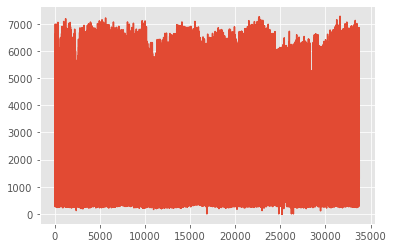

In [16]:
df['traffic_volume'].plot()

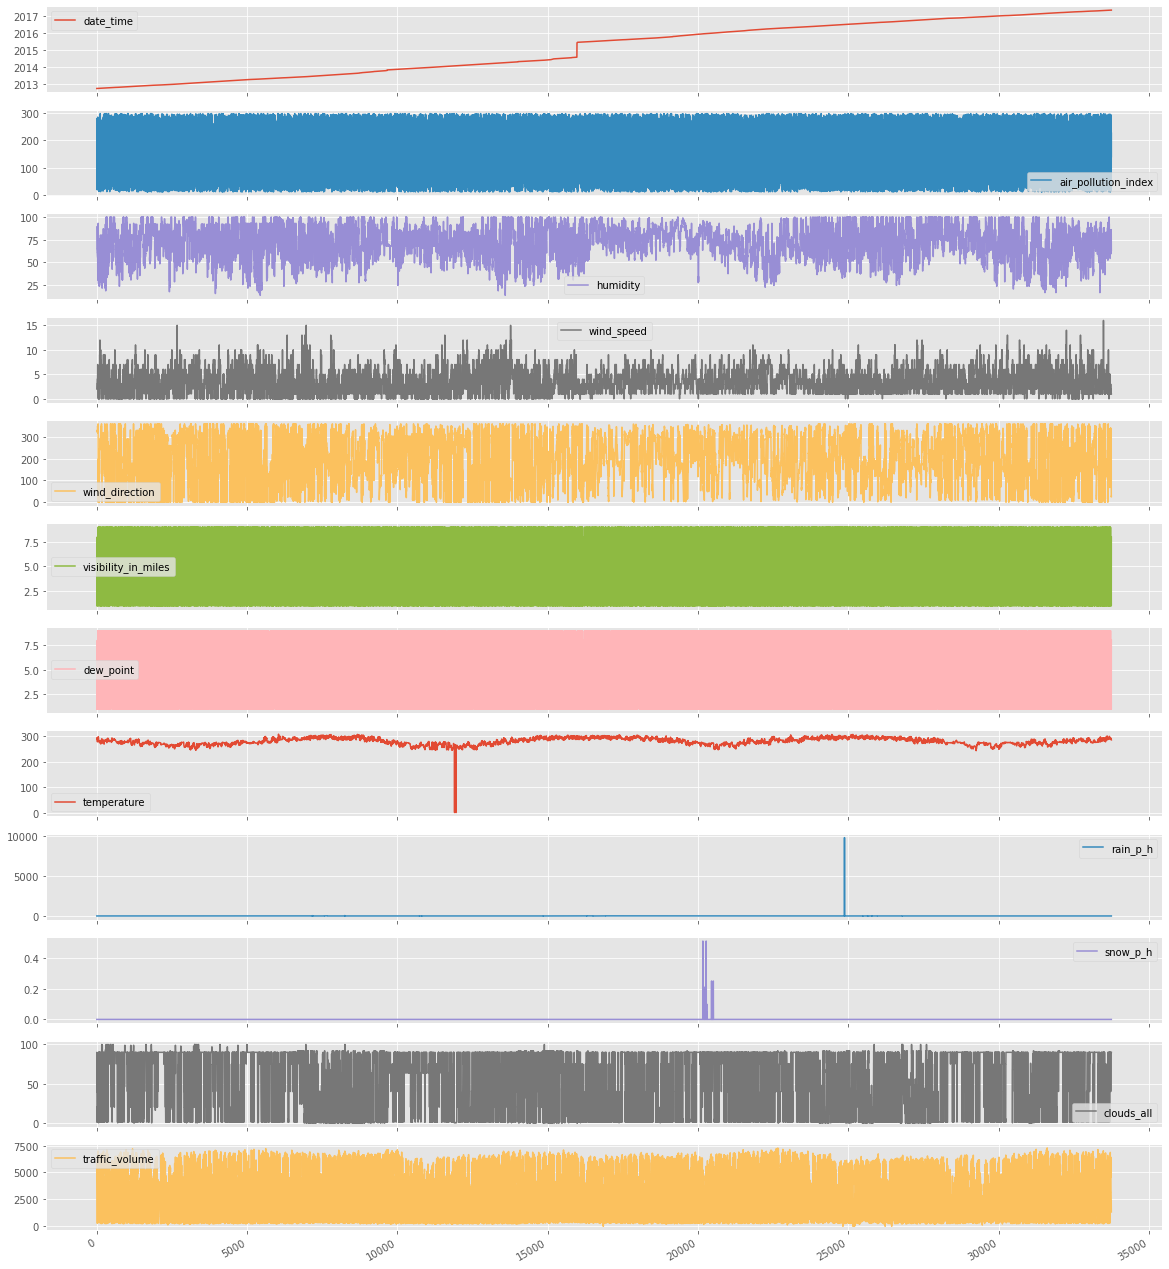

In [17]:
data.plot(subplots=True, figsize=(20, 25)); plt.legend(loc='best')

<AxesSubplot:xlabel='date_time'>

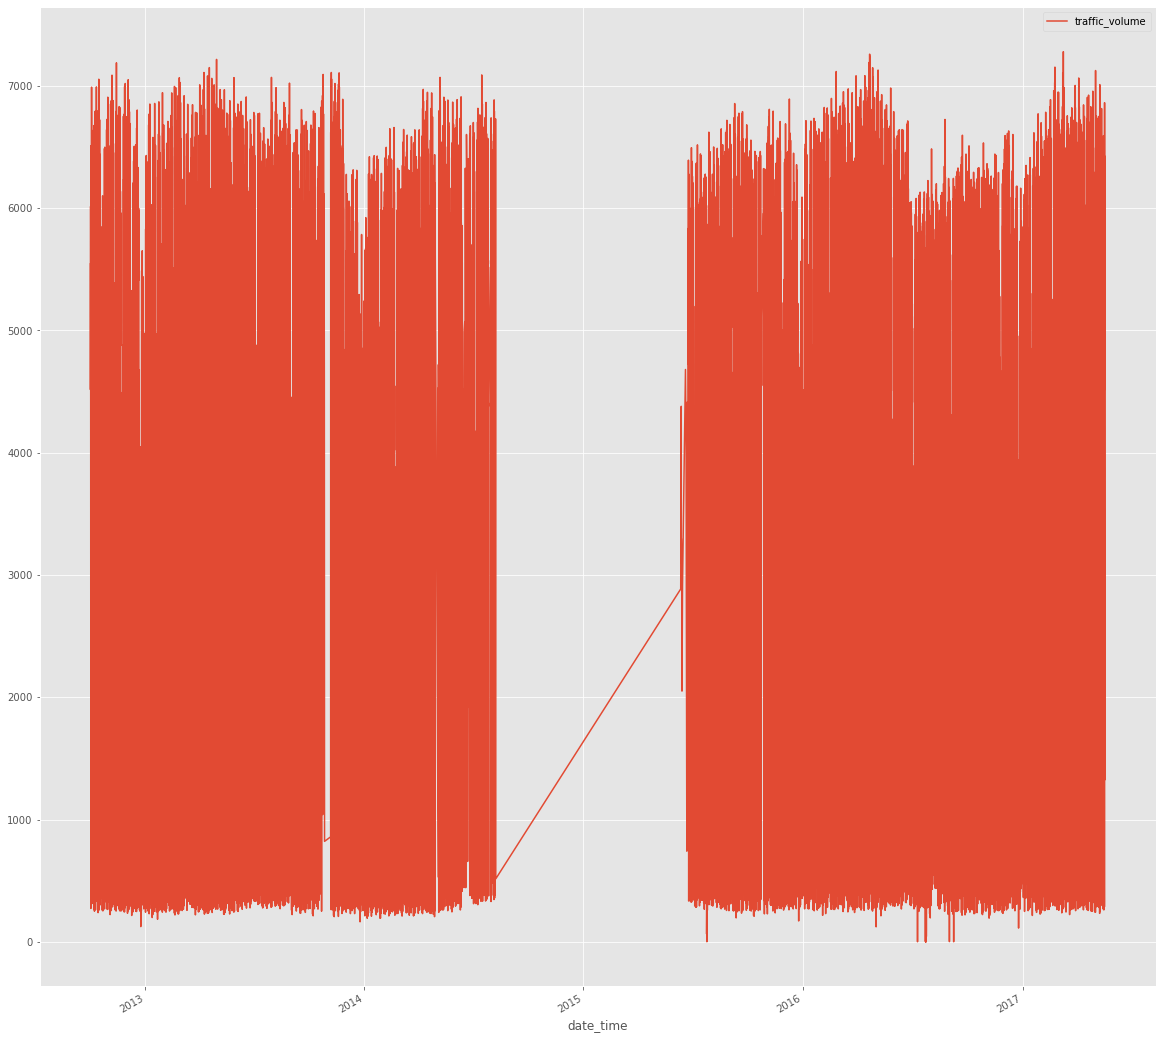

In [18]:
data.plot(x='date_time', y='traffic_volume', kind='line', figsize=(20,20))

In [19]:
print(data.shape)
data.head()

(33750, 14)


date_time  air_pollution_index  humidity  wind_speed  \
0 2012-10-02 09:00:00                  121        89           2   
1 2012-10-02 10:00:00                  178        67           3   
2 2012-10-02 11:00:00                  113        66           3   
3 2012-10-02 12:00:00                   20        66           3   
4 2012-10-02 13:00:00                  281        65           3   

   wind_direction  visibility_in_miles  dew_point  temperature  rain_p_h  \
0             329                    1          1       288.28       0.0   
1             330                    1          1       289.36       0.0   
2             329                    2          2       289.58       0.0   
3             329                    5          5       290.13       0.0   
4             329                    7          7       291.14       0.0   

   snow_p_h  clouds_all weather_type weather_description  traffic_volume  
0       0.0          40       Clouds    scattered clouds            5545  
1       0.0          75       Clouds       broken clouds            4516  
2       0.0          90       Clouds     overcast clouds            4767  
3       0.0          90       Clouds     overcast clouds            5026  
4       0.0          75       Clouds       broken clouds            4918

### `normalising` the dataset for `andrews curve`

In [16]:
def norm(x, m):
    x = x/m
    return x        

In [17]:
norm_df = deepcopy(data)

# norm_df.head()
norm_df['traffic_volume'] = norm_df['traffic_volume'].apply(norm, args=[norm_df['traffic_volume'].max()])
norm_df['air_pollution_index'] = norm_df['air_pollution_index'].apply(norm, args=[norm_df['air_pollution_index'].max()])
norm_df['humidity'] = norm_df['humidity'].apply(norm, args=[norm_df['humidity'].max()])
norm_df['wind_speed'] = norm_df['wind_speed'].apply(norm, args=[norm_df['wind_speed'].max()])
norm_df['wind_direction'] = norm_df['wind_direction'].apply(norm, args=[norm_df['wind_direction'].max()])
norm_df['dew_point'] = norm_df['dew_point'].apply(norm, args=[norm_df['dew_point'].max()])
norm_df['temperature'] = norm_df['temperature'].apply(norm, args=[norm_df['temperature'].max()])
norm_df['visibility_in_miles'] = norm_df['visibility_in_miles'].apply(norm, args=[norm_df['visibility_in_miles'].max()])
norm_df['rain_p_h'] = norm_df['rain_p_h'].apply(norm, args=[norm_df['rain_p_h'].max()])
norm_df['snow_p_h'] = norm_df['snow_p_h'].apply(norm, args=[norm_df['snow_p_h'].max()])
norm_df['clouds_all'] = norm_df['clouds_all'].apply(norm, args=[norm_df['clouds_all'].max()])

In [18]:
norm_df.drop(columns=['date_time', 'weather_description'], axis = 1, inplace=True)
norm_df.head()

air_pollution_index  humidity  wind_speed  wind_direction  \
0             0.404682      0.89      0.1250        0.913889   
1             0.595318      0.67      0.1875        0.916667   
2             0.377926      0.66      0.1875        0.913889   
3             0.066890      0.66      0.1875        0.913889   
4             0.939799      0.65      0.1875        0.913889   

   visibility_in_miles  dew_point  temperature  rain_p_h  snow_p_h  \
0             0.111111   0.111111     0.935245       0.0       0.0   
1             0.111111   0.111111     0.938749       0.0       0.0   
2             0.222222   0.222222     0.939463       0.0       0.0   
3             0.555556   0.555556     0.941247       0.0       0.0   
4             0.777778   0.777778     0.944524       0.0       0.0   

   clouds_all weather_type  traffic_volume  
0        0.40       Clouds        0.761676  
1        0.75       Clouds        0.620330  
2        0.90       Clouds        0.654808  
3        0.90       Clouds        0.690385  
4        0.75       Clouds        0.675549

In [19]:
norm_df.dtypes

air_pollution_index    float64
humidity               float64
wind_speed             float64
wind_direction         float64
visibility_in_miles    float64
dew_point              float64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all             float64
weather_type            object
traffic_volume         float64
dtype: object

<AxesSubplot:>

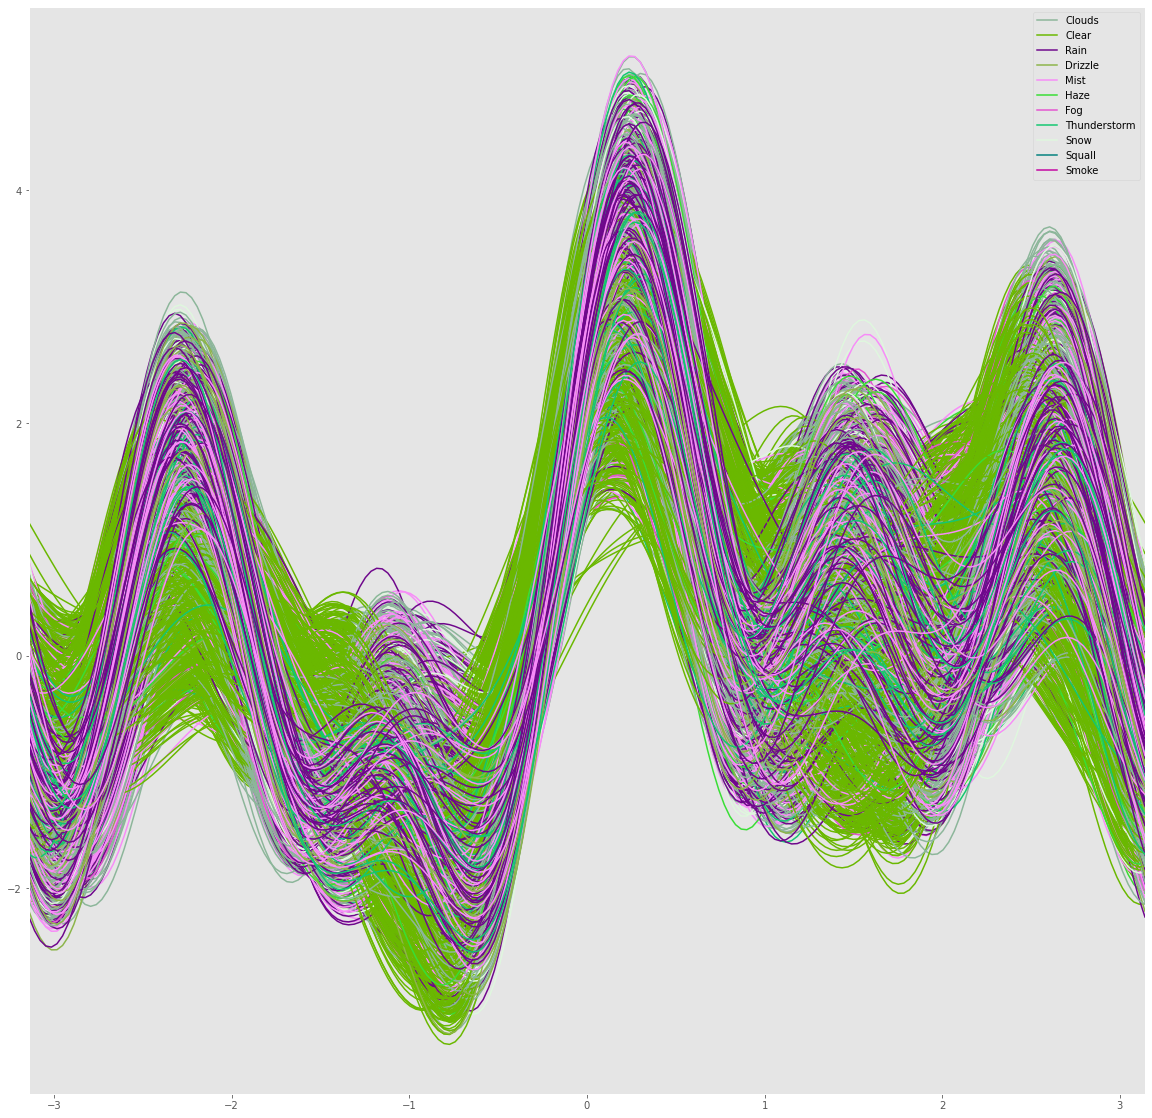

In [37]:
# from pandas.tools.plotting import andrews_curves
plt.figure(figsize=(20, 20))
pd.plotting.andrews_curves(norm_df, 'weather_type')

<AxesSubplot:>

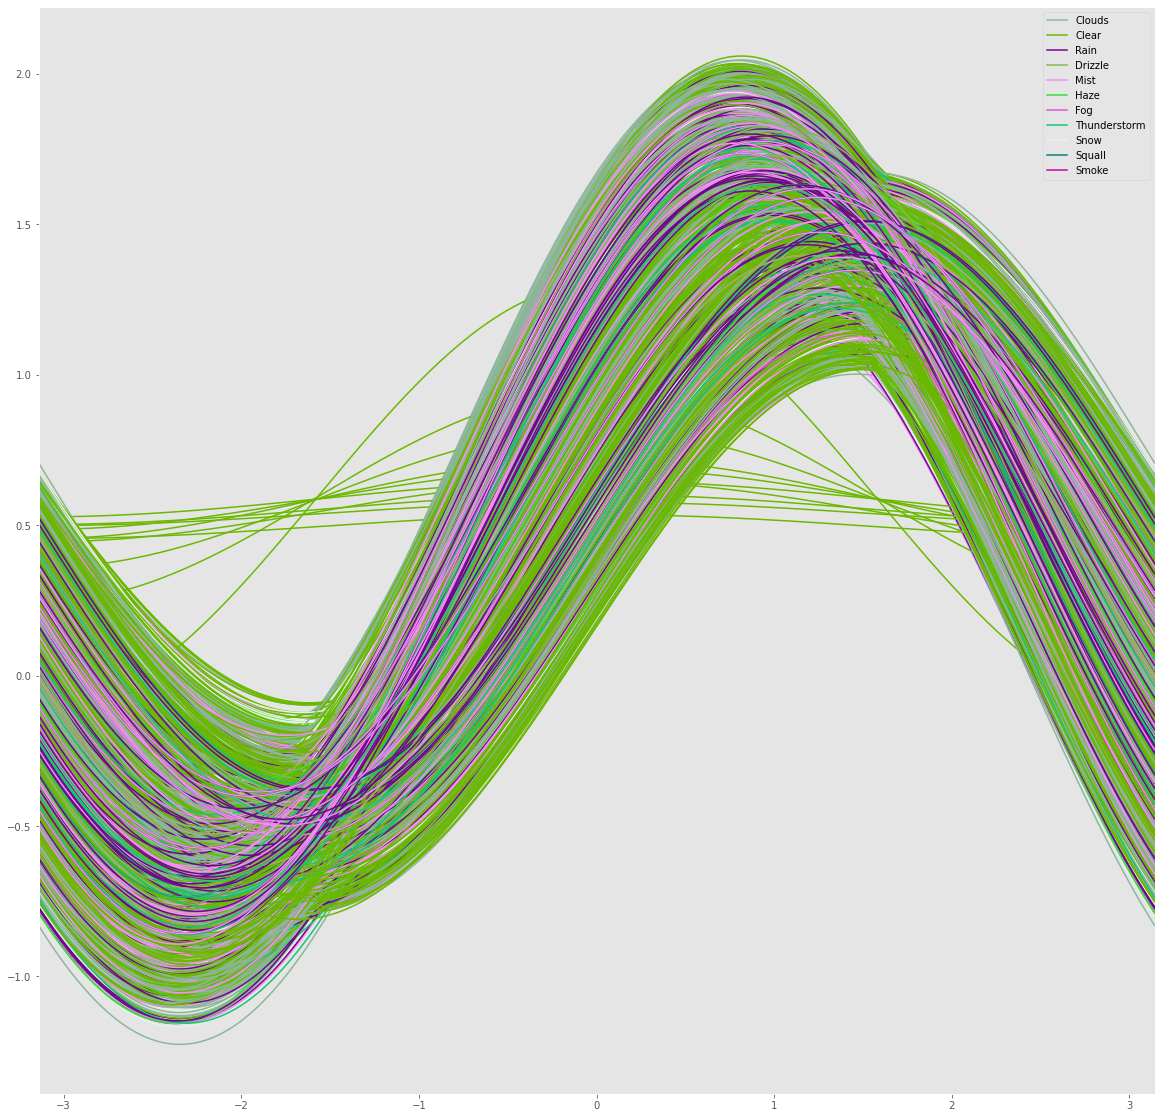

In [36]:
plt.figure(figsize=(20, 20))
pd.plotting.andrews_curves(norm_df[['humidity', 'temperature', 'weather_type', 'traffic_volume']], 'weather_type')

In [39]:
# data.drop(columns=['weather_description'], axis=1, inplace=True)
data.head()

air_pollution_index  humidity  wind_speed  wind_direction  \
0                  121        89           2             329   
1                  178        67           3             330   
2                  113        66           3             329   
3                   20        66           3             329   
4                  281        65           3             329   

   visibility_in_miles  dew_point  temperature  rain_p_h  snow_p_h  \
0                    1          1       288.28       0.0       0.0   
1                    1          1       289.36       0.0       0.0   
2                    2          2       289.58       0.0       0.0   
3                    5          5       290.13       0.0       0.0   
4                    7          7       291.14       0.0       0.0   

   clouds_all weather_type  traffic_volume  
0          40       Clouds            5545  
1          75       Clouds            4516  
2          90       Clouds            4767  
3          90       Clouds            5026  
4          75       Clouds            4918

c:\users\sahil singh\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='weather_description'>

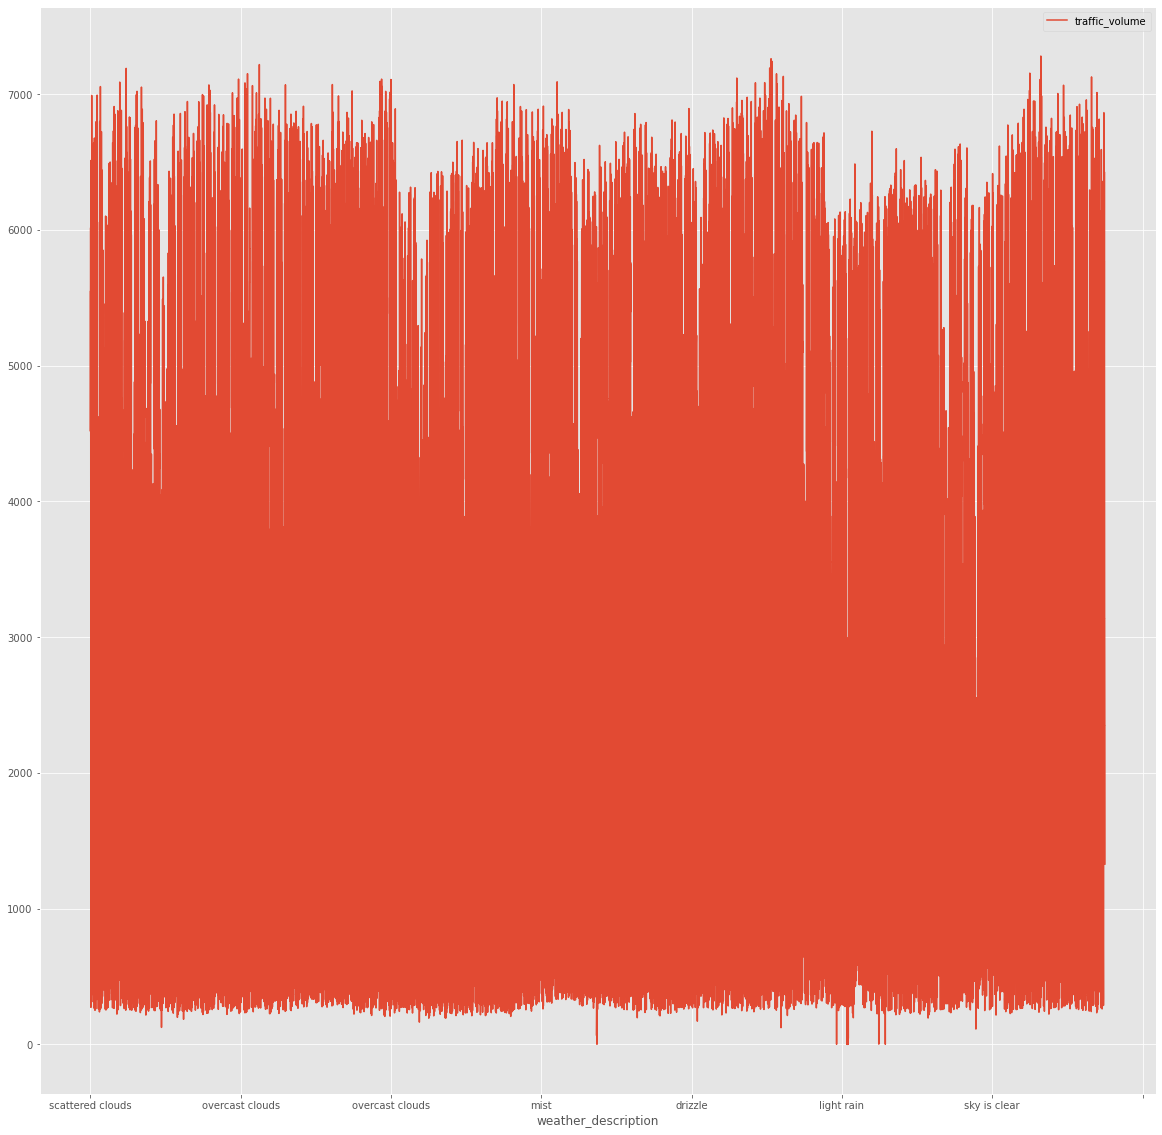

In [19]:
data.plot(x='weather_description', y='traffic_volume', kind='line', figsize=(20,20))

<AxesSubplot:>

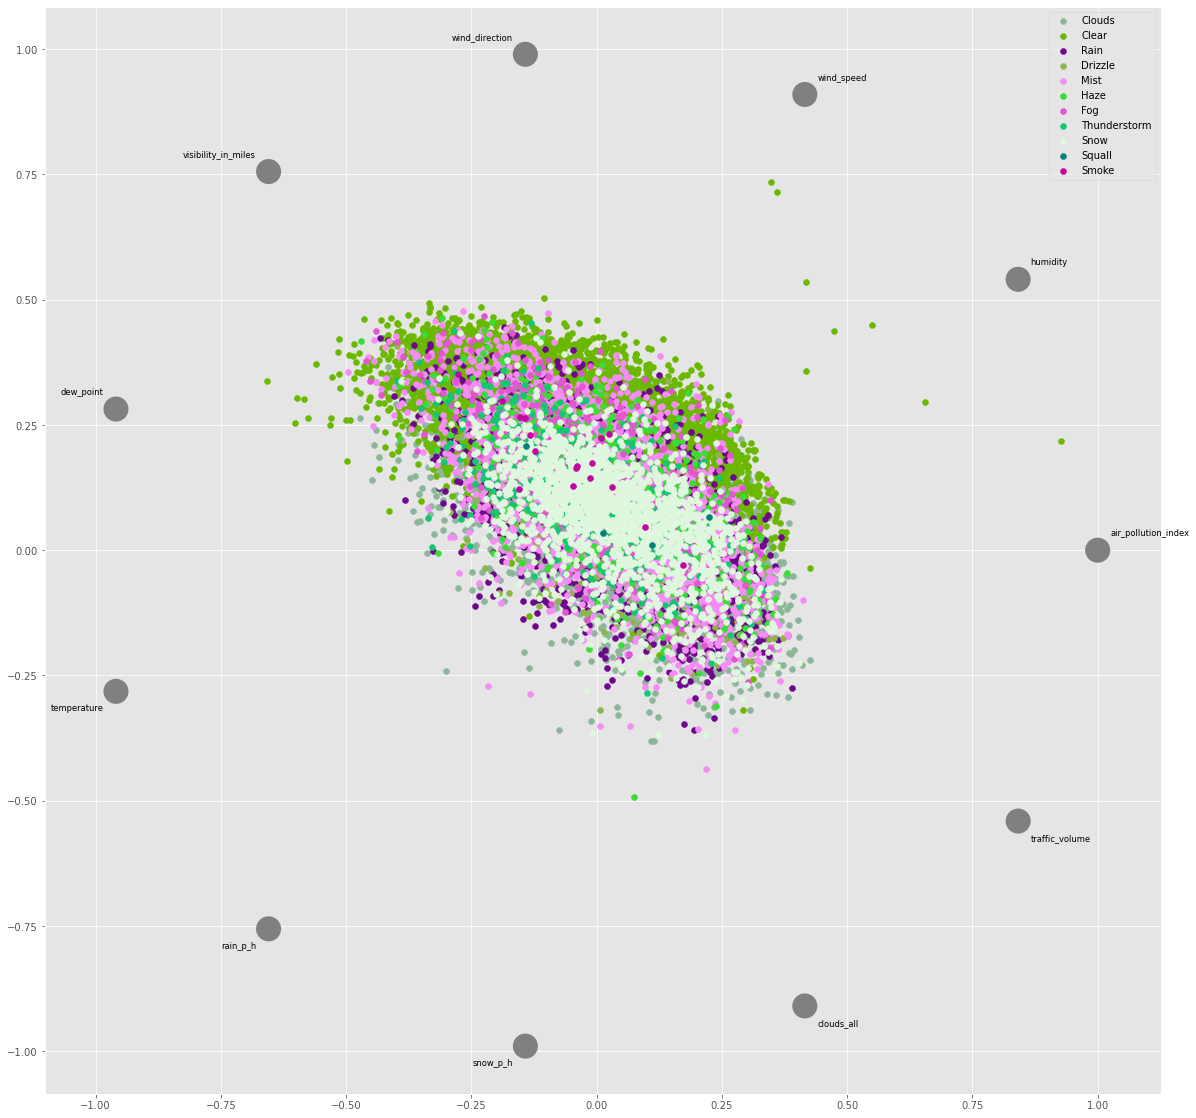

In [30]:
plt.figure(figsize=(20,20))
pd.plotting.radviz(norm_df, 'weather_type')

<AxesSubplot:>

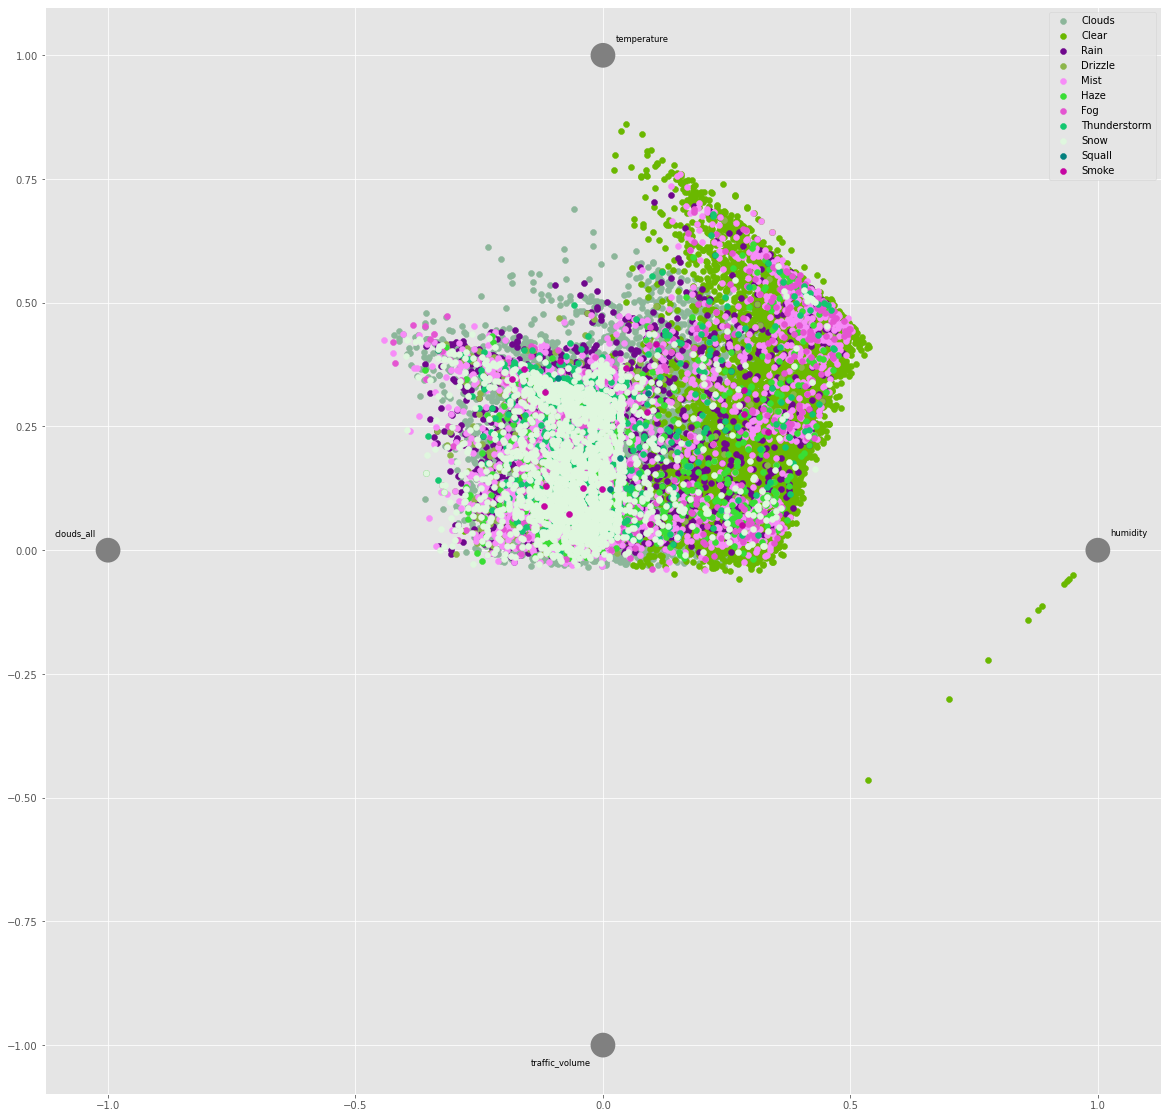

In [23]:
# df, data, norm_df --> DataFrame
plt.figure(figsize=(20,20))
pd.plotting.radviz(norm_df[['humidity', 'temperature', 'clouds_all','weather_type', 'traffic_volume']], 'weather_type')


array([[<AxesSubplot:title={'center':'air_pollution_index'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'wind_speed'}>],
       [<AxesSubplot:title={'center':'wind_direction'}>,
        <AxesSubplot:title={'center':'visibility_in_miles'}>,
        <AxesSubplot:title={'center':'dew_point'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'rain_p_h'}>,
        <AxesSubplot:title={'center':'snow_p_h'}>],
       [<AxesSubplot:title={'center':'clouds_all'}>,
        <AxesSubplot:title={'center':'traffic_volume'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 1440x1800 with 0 Axes>

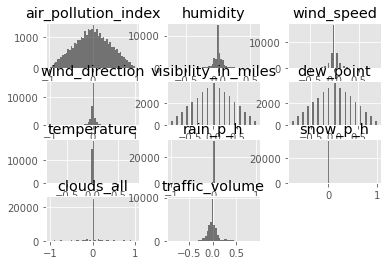

In [34]:
# norm_df.head()

#define number of rows and columns for subplots
nrow=3
ncol=2
# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4, df5, df6]
fig, axes = plt.subplots(nrow, ncol)
# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(ax=axes[r,c])
        count=+1

plt.figure(figsize=(20, 25))
norm_df.drop(['weather_type'], axis=1).diff().hist(color='k', alpha=0.5, bins=50)